![Bikeshare Insights Header Image](bike_share_header.png)


# Bikeshare Insights: Summer in the Windy City 

This dataset contains information on Divvy Bikes, a bikeshare program that provides residents and visitors of Chicago with a convenient way to explore the city. 

The workspace is set up with one CSV file containing bikeshare activities at the peak of the summer-July 2023. Columns include ride ID, bike type, start and end times, station names and IDs, location coordinates, and member type. Feel free to make this workspace yours by adding and removing cells, or editing any of the existing cells.

[Source: Divvy Bikes](https://divvybikes.com/system-data)

### 🌎 **Some guiding questions to help you explore this data:**
1. How many observations are in the dataset? Are there null values? 
2. How would you clean and prepare the data for analysis?
3. Which bike types are popular and which ones aren't? Check if being a member or casual rider makes a difference in bike choice.
4. Time check! What are the peak and off-peak riding times during the day?

### 📊 **Visualization ideas**
- Bar chart: Display the number of times each bike type is used to identify the most and least used bikes.
- Grouped bar chart: Compare bike usage by member type (member vs. casual) to see if it affects bike choice.
- Heatmap: Vividly illustrate the popularity of bikes at different times during the day and week.

You can query the pre-loaded CSV files using SQL directly. Here’s a **sample query**:

In [2]:
SELECT rideable_type, start_station_name
FROM '202307-divvy-tripdata.parquet'
LIMIT 10

rideable_type        start_station_name
0  electric_bike     Kedzie Ave & 110th St
1   classic_bike   Western Ave & Walton St
2   classic_bike   Western Ave & Walton St
3  electric_bike  Racine Ave & Randolph St
4   classic_bike     Clark St & Leland Ave
5   classic_bike  Racine Ave & Randolph St
6   classic_bike     Clark St & Leland Ave
7   classic_bike     Clark St & Leland Ave
8  electric_bike     Clark St & Leland Ave
9   classic_bike          Warren Park East

In [3]:
import pandas as pd
divvy_jan2023 = pd.read_parquet("202307-divvy-tripdata.parquet")
divvy_jan2023.head()

ride_id  rideable_type  ...    end_lng member_casual
0  9340B064F0AEE130  electric_bike  ... -87.653041        member
1  D1460EE3CE0D8AF8   classic_bike  ... -87.648384        member
2  DF41BE31B895A25E   classic_bike  ... -87.677692        member
3  9624A293749EF703  electric_bike  ... -87.641190        member
4  2F68A6A4CDB4C99A   classic_bike  ... -87.638181        member

[5 rows x 13 columns]

In [4]:
divvy_jan2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767650 entries, 0 to 767649
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             767650 non-null  object 
 1   rideable_type       767650 non-null  object 
 2   started_at          767650 non-null  object 
 3   ended_at            767650 non-null  object 
 4   start_station_name  644707 non-null  object 
 5   start_station_id    644707 non-null  object 
 6   end_station_name    637346 non-null  object 
 7   end_station_id      637346 non-null  object 
 8   start_lat           767650 non-null  float64
 9   start_lng           767650 non-null  float64
 10  end_lat             766396 non-null  float64
 11  end_lng             766396 non-null  float64
 12  member_casual       767650 non-null  object 
dtypes: float64(4), object(9)
memory usage: 76.1+ MB


In [5]:
divvy_jan2023.describe()

start_lat      start_lng        end_lat        end_lng
count  767650.000000  767650.000000  766396.000000  766396.000000
mean       41.905647     -87.646413      41.906054     -87.646643
std         0.042675       0.026904       0.042829       0.027046
min        41.648501     -87.920000      41.610000     -87.920000
25%        41.883073     -87.660000      41.883181     -87.660000
50%        41.901087     -87.642962      41.902924     -87.643118
75%        41.931931     -87.629544      41.932418     -87.629634
max        42.070000     -87.528232      42.180000     -87.510000

In [6]:
divvy_jan2023.shape

(767650, 13)

## **1a. Are there any null values in the dataset?**

In [7]:
divvy_jan2023.isnull()

ride_id  rideable_type  started_at  ...  end_lat  end_lng  member_casual
0         False          False       False  ...    False    False          False
1         False          False       False  ...    False    False          False
2         False          False       False  ...    False    False          False
3         False          False       False  ...    False    False          False
4         False          False       False  ...    False    False          False
...         ...            ...         ...  ...      ...      ...            ...
767645    False          False       False  ...    False    False          False
767646    False          False       False  ...    False    False          False
767647    False          False       False  ...    False    False          False
767648    False          False       False  ...    False    False          False
767649    False          False       False  ...    False    False          False

[767650 rows x 13 columns]

In [8]:
divvy_jan2023.isna()

ride_id  rideable_type  started_at  ...  end_lat  end_lng  member_casual
0         False          False       False  ...    False    False          False
1         False          False       False  ...    False    False          False
2         False          False       False  ...    False    False          False
3         False          False       False  ...    False    False          False
4         False          False       False  ...    False    False          False
...         ...            ...         ...  ...      ...      ...            ...
767645    False          False       False  ...    False    False          False
767646    False          False       False  ...    False    False          False
767647    False          False       False  ...    False    False          False
767648    False          False       False  ...    False    False          False
767649    False          False       False  ...    False    False          False

[767650 rows x 13 columns]

In [9]:
divvy_jan2023.isna().any()

ride_id               False
rideable_type         False
started_at            False
ended_at              False
start_station_name     True
start_station_id       True
end_station_name       True
end_station_id         True
start_lat             False
start_lng             False
end_lat                True
end_lng                True
member_casual         False
dtype: bool

In [10]:
divvy_jan2023.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    122943
start_station_id      122943
end_station_name      130304
end_station_id        130304
start_lat                  0
start_lng                  0
end_lat                 1254
end_lng                 1254
member_casual              0
dtype: int64

In [11]:
divvy_jan2023.isna().any().sum()

6

## 2.cleaning and preparing the data for analysis

In [31]:
divvy_jan2023.dropna()

ride_id  rideable_type  ... hour day_of_week
0       9340B064F0AEE130  electric_bike  ...   20           6
1       D1460EE3CE0D8AF8   classic_bike  ...   17           6
2       DF41BE31B895A25E   classic_bike  ...   10           6
3       9624A293749EF703  electric_bike  ...    8           4
4       2F68A6A4CDB4C99A   classic_bike  ...   15           5
...                  ...            ...  ...  ...         ...
767338  3B228F52743C58B7   classic_bike  ...   13           4
767444  67BE62CFD9B1E3EA  electric_bike  ...   13           0
767535  E771BD59731AEC4D  electric_bike  ...   18           2
767594  70B7A0759219DB7E  electric_bike  ...   13           3
767626  C2B90902C368721D  electric_bike  ...    7           4

[573958 rows x 17 columns]

In [14]:
divvy_jan2023.dropna(axis=1)

ride_id  rideable_type  ...  start_lng member_casual
0       9340B064F0AEE130  electric_bike  ... -87.700905        member
1       D1460EE3CE0D8AF8   classic_bike  ... -87.686596        member
2       DF41BE31B895A25E   classic_bike  ... -87.686596        member
3       9624A293749EF703  electric_bike  ... -87.656943        member
4       2F68A6A4CDB4C99A   classic_bike  ... -87.667291        member
...                  ...            ...  ...        ...           ...
767645  57F5743A5828DA62  electric_bike  ... -87.680000        member
767646  2FF218D4C8F0EF1C  electric_bike  ... -87.680000        member
767647  2661FBD1F5A1C76D  electric_bike  ... -87.650000        member
767648  9CF4B70C23E033B1  electric_bike  ... -87.630000        member
767649  7AD613C71AD143CD  electric_bike  ... -87.650000        member

[767650 rows x 7 columns]

## 3.Which bike types are popular and which ones aren't? Check if being a member or casual rider makes a difference in bike choice

In [15]:
divvy_jan2023['rideable_type'].value_counts()

electric_bike    387096
classic_bike     362130
docked_bike       18424
Name: rideable_type, dtype: int64

In [16]:
divvy_jan2023['rideable_type'].value_counts().idxmax()

'electric_bike'

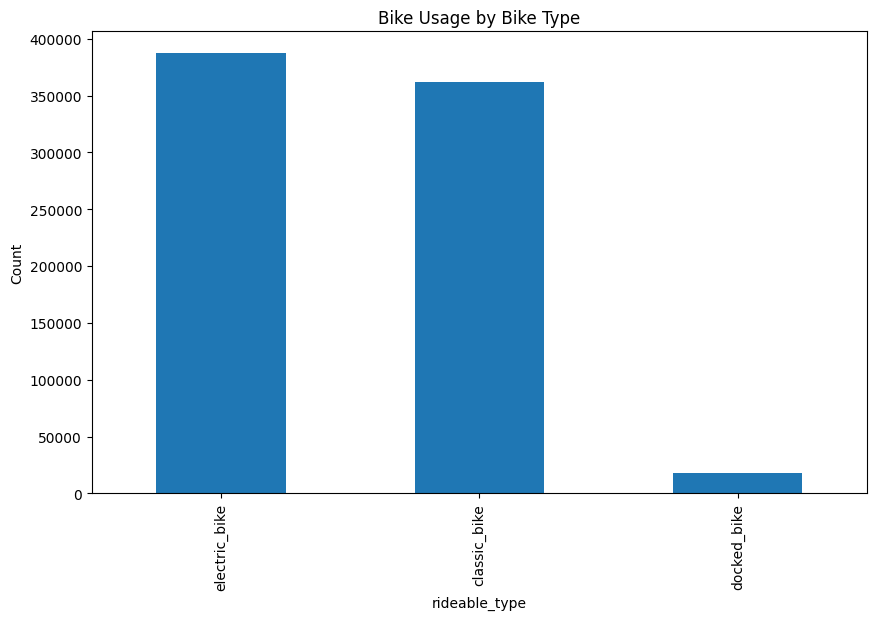

The most used bike type is: electric_bike
The least used bike type is: docked_bike


In [17]:

import matplotlib.pyplot as plt


# Count the occurrences of each bike type
bike_counts = divvy_jan2023['rideable_type'].value_counts()

# Create a bar chart to visualize bike usage
bike_counts.plot(kind='bar', figsize=(10, 6))

# Customize the chart labels and title
plt.xlabel('rideable_type')
plt.ylabel('Count')
plt.title('Bike Usage by Bike Type')

# Show the chart
plt.show()
 
     
# Identify the most used and least used bikes
most_used_bike = bike_counts.idxmax()
least_used_bike = bike_counts.idxmin()

print(f"The most used bike type is: {most_used_bike}")
print(f"The least used bike type is: {least_used_bike}")




In [18]:
divvy_jan2023.loc[divvy_jan2023['rideable_type'].values.argmax()]

ride_id                                  9340B064F0AEE130
rideable_type                               electric_bike
started_at                            2023-07-23 20:06:14
ended_at                              2023-07-23 20:22:44
start_station_name                  Kedzie Ave & 110th St
start_station_id                                    20204
end_station_name      Public Rack - Racine Ave & 109th Pl
end_station_id                                        877
start_lat                                       41.692406
start_lng                                      -87.700905
end_lat                                         41.694835
end_lng                                        -87.653041
member_casual                                      member
Name: 0, dtype: object

In [19]:
divvy_jan2023.max()['rideable_type']

'electric_bike'

In [20]:
divvy_jan2023.groupby(['member_casual', 'rideable_type']).size().unstack(fill_value=0)

rideable_type  classic_bike  docked_bike  electric_bike
member_casual                                          
casual               142882        18424         170052
member               219248            0         217044

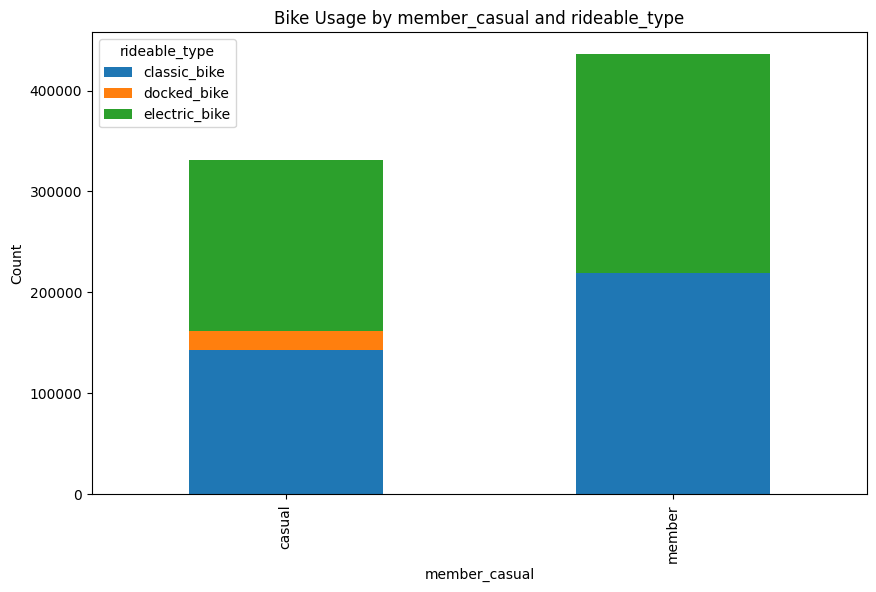

In [21]:
import matplotlib.pyplot as plt

# Create a grouped bar chart
bike_choice_by_user_type = divvy_jan2023.groupby(['member_casual', 'rideable_type']).size().unstack(fill_value=0)
bike_choice_by_user_type.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the chart labels and title
plt.xlabel('member_casual')
plt.ylabel('Count')
plt.title('Bike Usage by member_casual and rideable_type')

# Add a legend
plt.legend(title='rideable_type')

# Show the chart
plt.show()

## 4. To identify peak and off-peak riding times during the day

In [22]:
divvy_jan2023['started_at'] = pd.to_datetime(divvy_jan2023['started_at'])
divvy_jan2023['ended_at'] = pd.to_datetime(divvy_jan2023['ended_at'])
 
#Extract the hour component from the 'started_at' column:
 
divvy_jan2023['start_hour'] = divvy_jan2023['started_at'].dt.hour
 
#Create a new column to categorize the time as peak or off-peak based on your definition. For example, you can categorize hours between 7 AM and 9 AM as peak hours and all other hours as off-peak:
 
divvy_jan2023['time_category'] = divvy_jan2023['start_hour'].apply(lambda x: 'Peak' if 7 <= x <= 9 else 'Off-Peak')

#Count the number of rides during peak and off-peak hours:
 
ride_counts = divvy_jan2023['time_category'].value_counts()
ride_counts




Off-Peak    674869
Peak         92781
Name: time_category, dtype: int64

In [23]:
divvy_jan2023.head()

ride_id  rideable_type  ... start_hour time_category
0  9340B064F0AEE130  electric_bike  ...         20      Off-Peak
1  D1460EE3CE0D8AF8   classic_bike  ...         17      Off-Peak
2  DF41BE31B895A25E   classic_bike  ...         10      Off-Peak
3  9624A293749EF703  electric_bike  ...          8          Peak
4  2F68A6A4CDB4C99A   classic_bike  ...         15      Off-Peak

[5 rows x 15 columns]

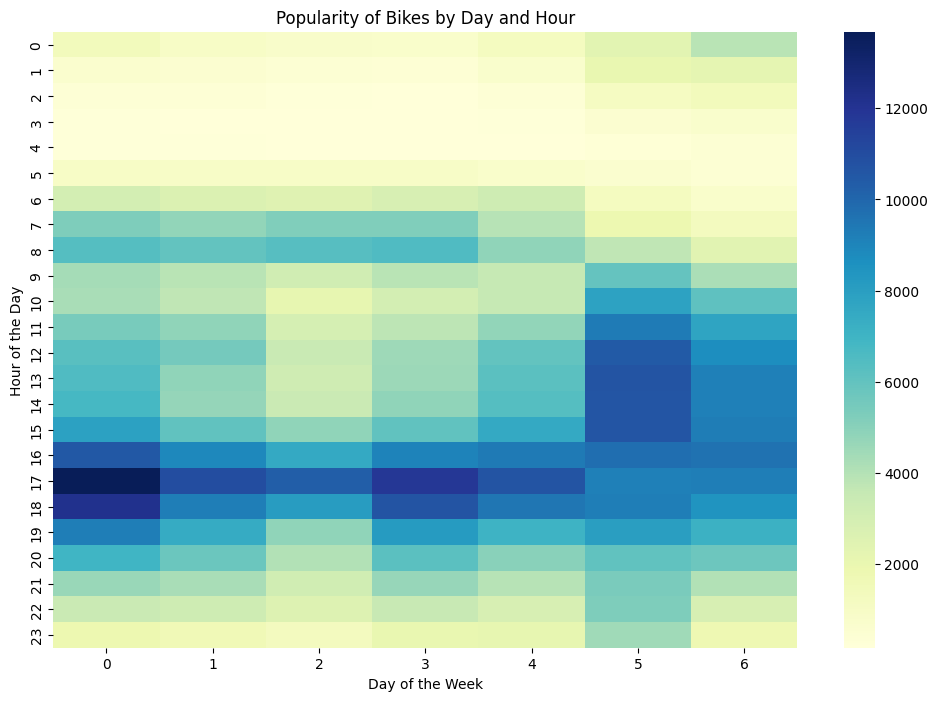

day_of_week      0      1      2      3      4      5     6
hour                                                       
0             1422    982    849    775   1223   2355  3860
1              689    565    463    375    700   2019  2244
2              344    333    252    213    329   1133  1408
3              237    191    170    163    216    535   719
4              247    227    179    203    199    314   465
5             1002    948    907    907    762    612   474
6             3039   2647   2492   2842   3229   1253   770
7             5259   4807   5180   5220   3953   1876  1294
8             6388   5973   6332   6505   4850   3717  2386
9             4367   3907   3163   3881   3592   5954  4177
10            4244   3714   2126   3061   3587   7850  6112
11            5406   4856   2939   3783   4802   9301  7736
12            6254   5530   3487   4537   5988  10429  8670
13            6518   4834   3225   4592   6188  10680  9152
14            6764   4747   3419   4844   6359  10646  9166
15            7883   6042   4850   6031   7536  10641  9292
16           10540   8888   7548   9071   9369   9732  9650
17           13681  10940  10294  11885  10694   9150  9235
18           12160   9235   8085  10698   9502   9200  8493
19            9227   7403   4850   8154   7047   8000  7171
20            6928   5809   4043   6185   5009   6070  5723
21            4643   4261   3161   4683   3934   5378  4024
22            3393   3229   2549   3501   2819   5255  2814
23            1900   1629   1323   2016   2139   4456  1790

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'started_at' column to datetime
divvy_jan2023['started_at'] = pd.to_datetime(divvy_jan2023['started_at'])

# Extract the hour of the day and day of the week
divvy_jan2023['hour'] = divvy_jan2023['started_at'].dt.hour
divvy_jan2023['day_of_week'] = divvy_jan2023['started_at'].dt.dayofweek  # Monday=0, Sunday=6

# Create a pivot table to count rides by hour and day of the week
pivot_table = divvy_jan2023.pivot_table(index='hour', columns='day_of_week', values='rideable_type', aggfunc='count', fill_value=0)

# Create a heatmap to visualize the popularity of bikes at different times during the day and week
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', cbar=True)

# Customize the chart labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.title('Popularity of Bikes by Day and Hour')

# Show the heatmap
plt.show()
 
pivot_table